## Machine Learning Assignment
### Growlink
### We have used ensemble techniques to SMS spam classification, the architecture is also designed for better Understanding

In [48]:
# importing Essential libraries for data read from the dataset spam.csv
import pandas as pd
import numpy as np


In [49]:
# Reading the data set and spam.csv doesn't support UTF-8 so, we have used ISO encoding.
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [50]:
# Since, the data has unnamed columns, which are not required for our model development - So I removed them using loc[] function
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
# The length of the Data is displayed below:
len(data)

5572

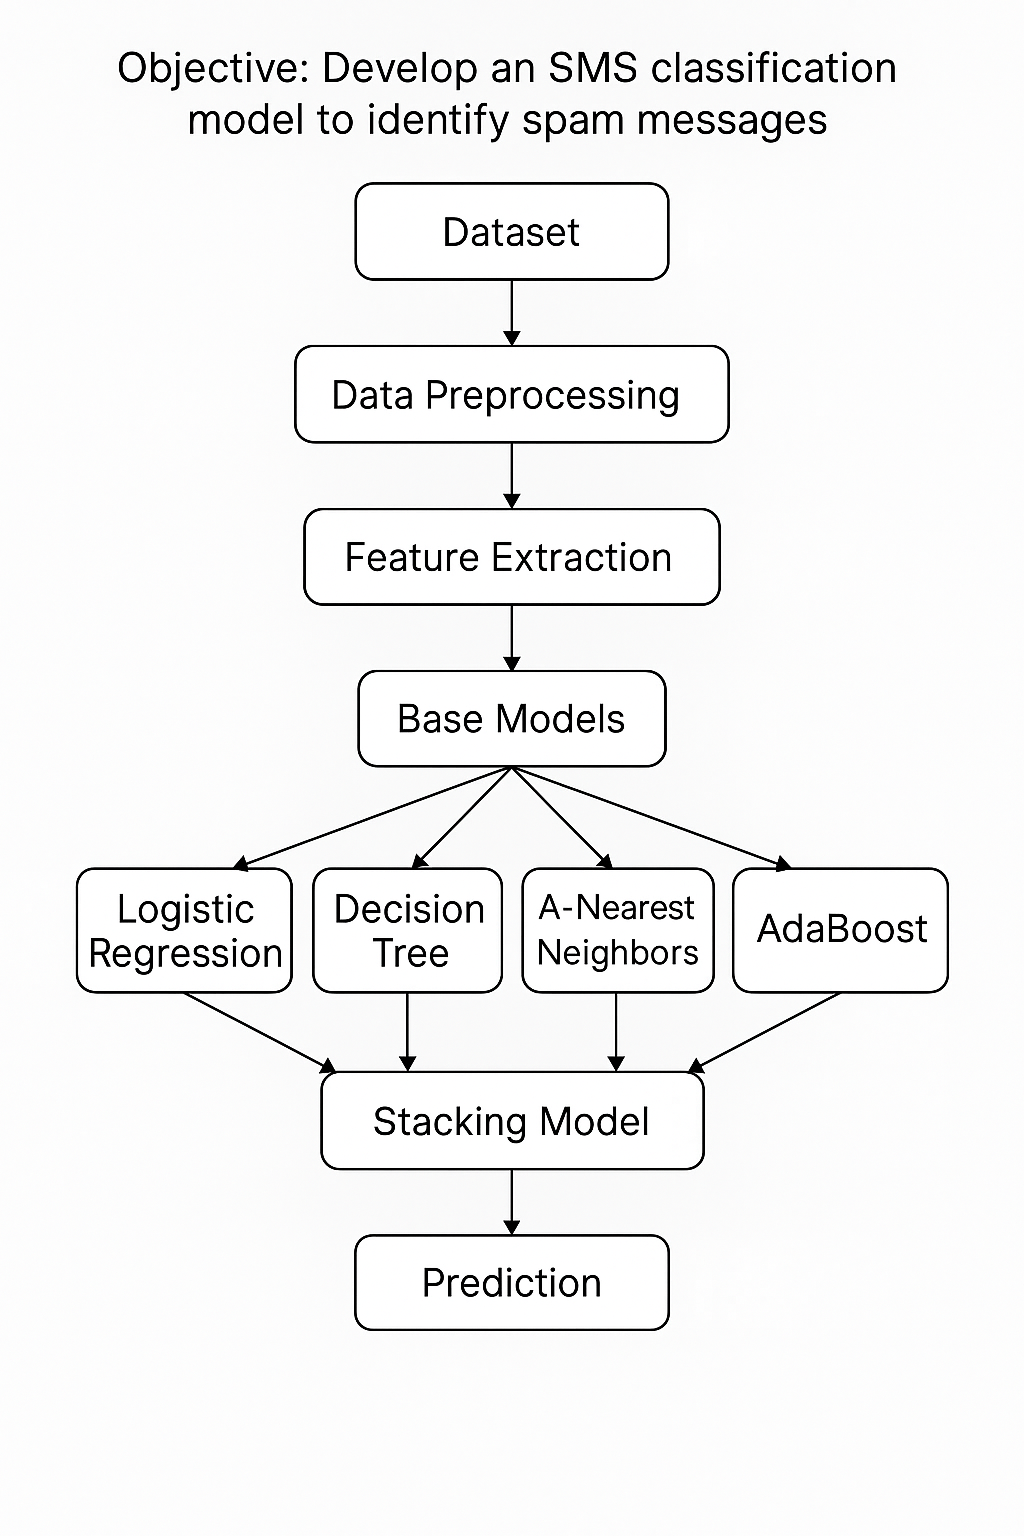

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64
Logistic Regression
Accuracy: 0.9501
Precision: 0.9836
Recall: 0.6400
F1-score: 0.7754

Decision Tree
Accuracy: 0.9652
Precision: 0.8927
Recall: 0.8427
F1-score: 0.8669

K-Nearest Neighbors
Accuracy: 0.8934
Precision: 1.0000
Recall: 0.2080
F1-score: 0.3444

AdaBoost
Accuracy: 0.9745
Precision: 0.9318
Recall: 0.8747
F1-score: 0.9023

Random Forest
Accuracy: 0.9738
Precision: 1.0000
Recall: 0.8053
F1-score: 0.8922

Stacking Model Improved Accuracy
Accuracy_stack: 0.9846
Precision_stack: 0.9826
Recall_stack: 0.9013
F1_score_stack: 0.9402
Cross-validated accuracy: 0.986
Elapsed time:5.40 seconds



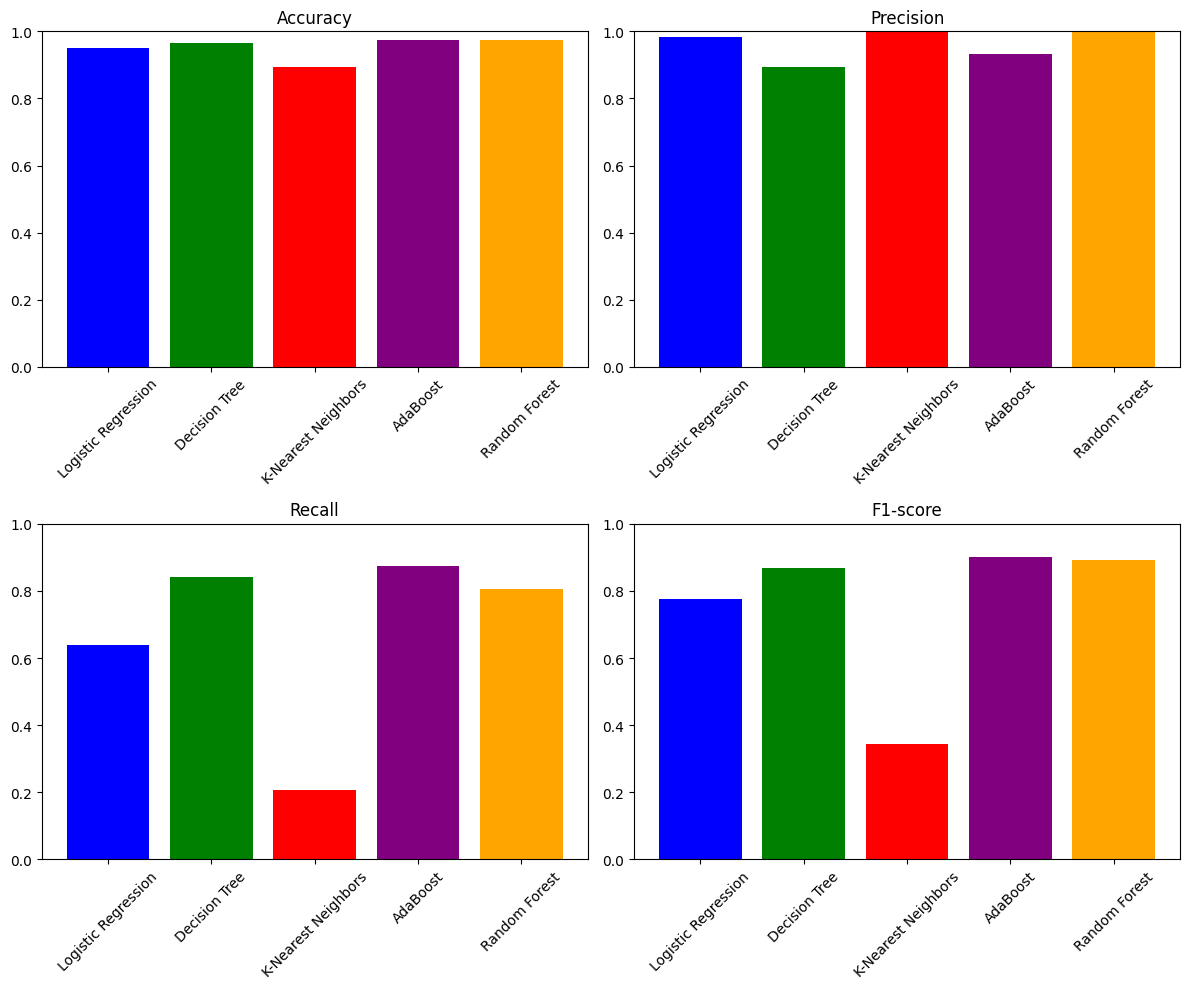

Model and vectorizer saved successfully.


In [52]:
#Importing all the essential Libraries and We use sklearn for base_models and stacking model as final model of our work
import matplotlib.pyplot as plt
import time # this is for displaying time contraint for the final stacking model
import seaborn as sns
import pickle
# importing train-test-split for training the model
from sklearn.model_selection import train_test_split
#importing Tfidvectorizer to find the exact word that are very important to the sentence, we can also use CountVectorizer() here.
from sklearn.feature_extraction.text import TfidfVectorizer
# From here we import the base models for our requirement, here we use Logistic regression, Decision Tree, KNN, Adaboost, RandomForest
# These basemodels are very specialized for their Robustness, Flexibility, and Working
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier
# To display metric I imported the metrics inbuilt in sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
# Here v1 is the label, v2 is the message column as mentioned in the dataset
# And from here data preprocessing begins
data['v1'] = data['v1'].map({'spam': 1, 'ham': 0})
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['v2'])
y = data['v1']
print(y)
# Data preprocessing completes ---->
# We now train the model using x_test, x_train, y_test, y_train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
base_models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Random Forest', RandomForestClassifier())
]
results = {}
# Here each model is tested and trained and printed with accuraries and all the metrics
for name, model in base_models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = [acc, prec, rec, f1]
    print(f"{name}\nAccuracy: {acc:.4f}\nPrecision: {prec:.4f}\nRecall: {rec:.4f}\nF1-score: {f1:.4f}\n")
# The final model of our work include stacking ensemble classifier that use estimators as base_models and final_estimator is Logistric Rergression()
# We also display the elapsed time
start = time.time()
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), n_jobs=-1)
stacking_model.fit(x_train, y_train)
y_pred_stacking = stacking_model.predict(x_test)
accuracy_stack = accuracy_score(y_test, y_pred_stacking)
precision_stack = precision_score(y_test, y_pred_stacking)
recall_stack = recall_score(y_test, y_pred_stacking)
f1_stack = f1_score(y_test, y_pred_stacking)
end = time.time()
# All the metric are displayed, I also tried to display the CV score which is very remarkable
print("Stacking Model Improved Accuracy")
print(f"Accuracy_stack: {accuracy_stack:.4f}")
print(f"Precision_stack: {precision_stack:.4f}")
print(f"Recall_stack: {recall_stack:.4f}")
print(f"F1_score_stack: {f1_stack:.4f}")
scores = cross_val_score(stacking_model, X, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy: %.3f" % scores.mean())
print(f"Elapsed time:{end - start:.2f} seconds\n")
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
# The plot comparing the model performances
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, metric in enumerate(metrics):
    values = [results[model][i] for model in results]
    models = list(results.keys())
    axes[i].bar(models, values, color=['blue', 'green', 'red', 'purple', 'orange'])
    axes[i].set_title(metric)
    axes[i].set_ylim([0, 1])
    axes[i].set_xticklabels(models, rotation=45)
plt.tight_layout()
plt.show()
# The model is saved using pickle model
with open("spam_grow.pkl", "wb") as model_file:
    pickle.dump(stacking_model, model_file)
with open("tfidf_grow.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)
print("Model and vectorizer saved successfully.")